This notebook is setup to make all of the plots in the readme so it's reproducible and seperate from the other annotated main notebook

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import shap
import seaborn as sns
if True:
    custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
    sns.set_style("darkgrid", rc=custom_style)
    plt.style.use("dark_background")
    I_like_dark_mode_plots = True
my_blue = '#2B59C3'
my_green = '#63C132'
my_red = '#DA2C38'


In [80]:
df = pd.read_csv("data/Customer Churn.csv", delimiter=",")
cont_keys = ['Call  Failure', 'Seconds of Use' , 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Customer Value', 'Subscription  Length']
ordinal_keys = ['Age Group', 'Charge  Amount']
binary_keys = ['Tariff Plan', 'Complains']

predictor_keys = [x for x in df.keys() if not (x  in ['Churn', 'Status', 'Age'])]
label_key = ['Churn']

In [81]:
final_model = HistGradientBoostingClassifier(class_weight = 'balanced', min_samples_leaf=36, learning_rate=0.1, l2_regularization=.1, max_iter=150)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df[predictor_keys], df[label_key].values.ravel(), stratify=df[label_key].values.ravel())
final_model.fit(Xtrain, Ytrain)

HistGradientBoostingClassifier(class_weight='balanced', l2_regularization=0.1,
                               max_iter=150, min_samples_leaf=36)

In [82]:
def model_wrapper(X):
    return final_model.predict(X)

explainer = shap.TreeExplainer(final_model)
shap_values = explainer(Xtest)

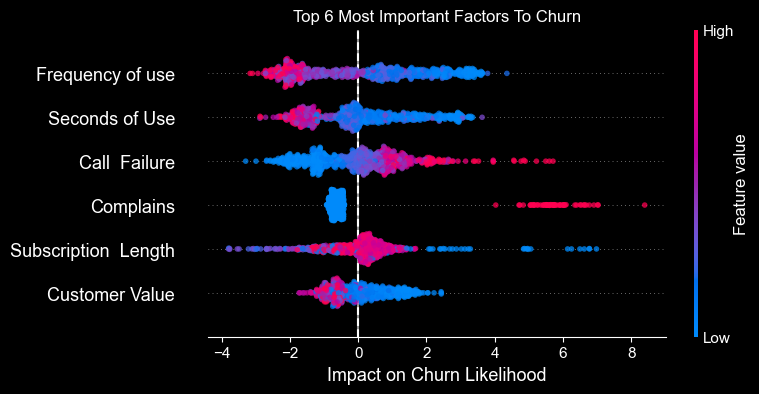

In [92]:
shap.summary_plot(shap_values, Xtest, color="coolwarm", alpha=0.75, max_display=6, show=False)
plt.gca().set_title('Top 6 Most Important Factors To Churn', color='white')
plt.gca().set_xlabel('Impact on Churn Likelihood', color='white')
plt.gca().tick_params(axis='both', colors='white')
plt.gca().grid(False)  # Remove grid lines
plt.axvline(x=0, color='white', linestyle='--')  # White dashed line at x=0
plt.show()


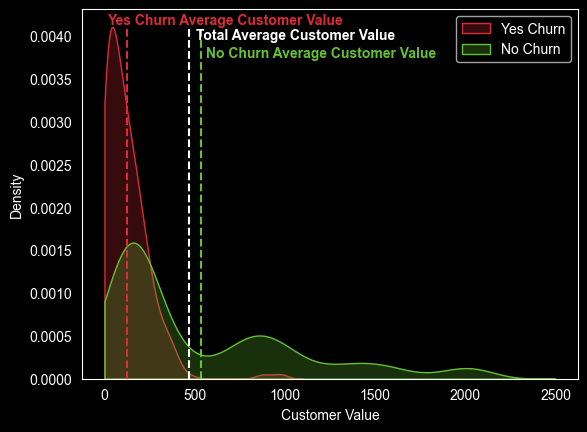

In [89]:
kde = sns.kdeplot(df[df.Churn == 1]['Customer Value'], fill=True, clip=(0, None), label = 'Yes Churn', color = my_red)

plt.vlines(np.mean(df[df.Churn == 1]['Customer Value'].values), 0, kde.dataLim.intervaly[1], linestyle = '--', color = my_red)
plt.text(0.05, 0.96, f'Yes Churn Average Customer Value',
                transform=plt.gca().transAxes, fontsize = 10, fontweight = 'semibold', color = my_red)

plt.vlines(np.mean(df['Customer Value'].values), 0, kde.dataLim.intervaly[1], linestyle = '--')
plt.text(0.23, 0.92, f'Total Average Customer Value', color='white',
                transform=plt.gca().transAxes, fontsize = 10, fontweight = 'semibold')

plt.vlines(np.mean(df[df.Churn == 0]['Customer Value'].values), 0, kde.dataLim.intervaly[1], linestyle = '--', color = my_green)
plt.text(0.25, 0.87, f'No Churn Average Customer Value',
                transform=plt.gca().transAxes, fontsize = 10, fontweight = 'semibold', color = my_green)

sns.kdeplot(df[df.Churn == 0]['Customer Value'], fill=True, clip=(0, None), label = 'No Churn', color = my_green)
kde.grid(False)
plt.legend()